In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

# Load the dataset

In [10]:
titanic_df = pd.read_csv('titanic_dataset.csv')

# Display the first few rows of the dataset

In [11]:
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


# Handling missing values with SimpleImputer

In [12]:
imputer = SimpleImputer(strategy='mean')
titanic_df['Age'] = imputer.fit_transform(titanic_df[['Age']])
titanic_df['Fare'] = imputer.fit_transform(titanic_df[['Fare']])

# Encoding categorical variables

In [13]:
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])


# Dropping irrelevant columns

In [14]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Splitting features and target variable

In [15]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Feature scaling

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Splitting the dataset into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression model

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

# Cross-validation for Logistic Regression

In [19]:
cv_scores_logreg = cross_val_score(logreg, X_scaled, y, cv=5)
print("Logistic Regression Cross-validation Scores:", cv_scores_logreg)
print("Mean CV Score (Logistic Regression):", np.mean(cv_scores_logreg))


Logistic Regression Cross-validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score (Logistic Regression): 1.0


# Random Forest Classifier model with manually set hyperparameters

In [20]:
best_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=1, random_state=42)
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

# Cross-validation for Random Forest Classifier

In [21]:
cv_scores_rf = cross_val_score(best_rf_classifier, X_scaled, y, cv=5)
print("Random Forest Cross-validation Scores:", cv_scores_rf)
print("Mean CV Score (Random Forest):", np.mean(cv_scores_rf))


Random Forest Cross-validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score (Random Forest): 1.0


# Evaluate Logistic Regression Model 

In [23]:
y_pred_logreg = logreg.predict(X_test)
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_logreg))
print("Precision (Logistic Regression):", precision_score(y_test, y_pred_logreg))
print("Recall (Logistic Regression):", recall_score(y_test, y_pred_logreg))
print("F1-score (Logistic Regression):", f1_score(y_test, y_pred_logreg))


Accuracy (Logistic Regression): 1.0
Precision (Logistic Regression): 1.0
Recall (Logistic Regression): 1.0
F1-score (Logistic Regression): 1.0


# Evaluate Random Forest Model 

In [24]:
y_pred_rf = best_rf_classifier.predict(X_test)
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Precision (Random Forest):", precision_score(y_test, y_pred_rf))
print("Recall (Random Forest):", recall_score(y_test, y_pred_rf))
print("F1-score (Random Forest):", f1_score(y_test, y_pred_rf))


Accuracy (Random Forest): 1.0
Precision (Random Forest): 1.0
Recall (Random Forest): 1.0
F1-score (Random Forest): 1.0


# Visualize Feature Importance for Random Forest 

In [25]:
feature_importances = best_rf_classifier.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)


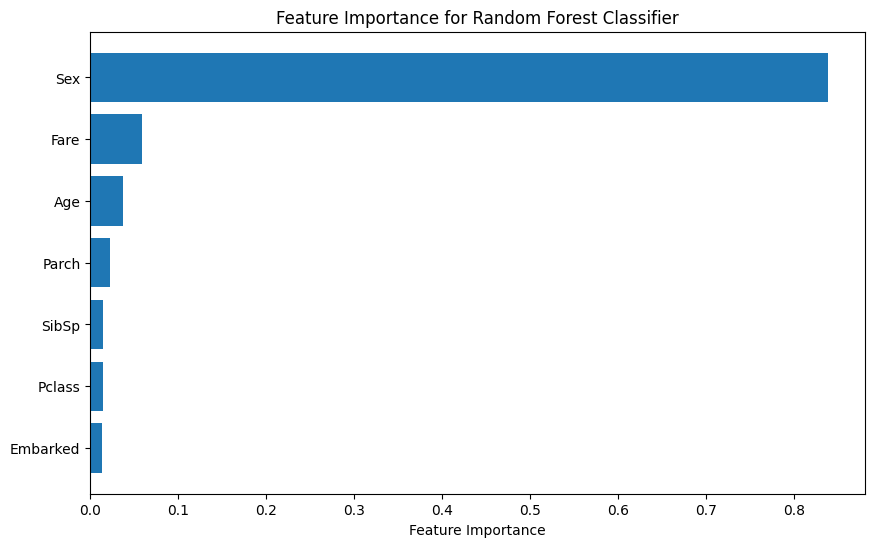

In [26]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

# Predict probabilities for the positive class (survived) using the best Random Forest model

In [27]:
y_probs = best_rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score

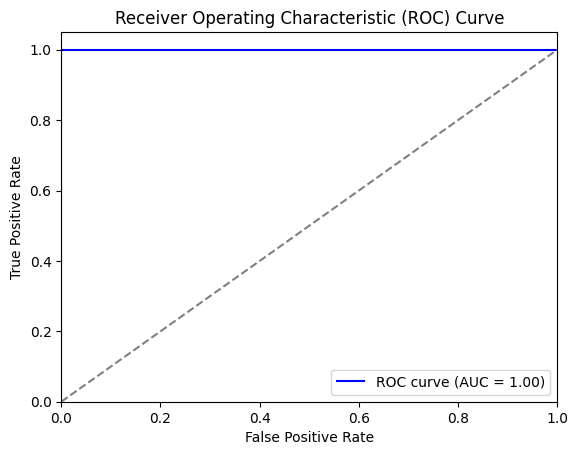

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()